In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.000000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 998:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.8000844628099316-0.00434655284180345j)], [(0.599621951229418-0.017305358418980923j)]]
iteracao:  2
[[(0.8004056185965347-0.007007963519503176j)], [(0.5985466732415975-0.03230501626453559j)]]
iteracao:  3
[[(0.8000699660758759-0.021034149794921148j)], [(0.5962803561220161-0.06241274484447128j)]]
iteracao:  4
[[(0.7976880277530232-0.0465061666613324j)], [(0.5915343241108177-0.10778742827629642j)]]
iteracao:  5
[[(0.7908054950416924-0.08382813764953337j)], [(0.5822497641066674-0.1690701673668231j)]]
iteracao:  6
[[(0.7908964221946245-0.0915197934874089j)], [(0.574508210331302-0.18986123863329427j)]]
iteracao:  7
[[(0.7984324339663911-0.07650967098491719j)], [(0.5698586494592383-0.17864219866458345j)]]
iteracao:  8
[[(0.8037252713093124-0.06855077428534626j)], [(0.5641196224880564-0.17633924116771849j)]]
iteracao:  9
[[(0.7934981926237564-0.10501529682851447j)], [(0.5506554404227507-0.23687757584615307j)]]
iteracao:  10
[[(0.7829395466878988-0.13530854955226493j)], [(0.53

[[(0.22154700863857357-0.8106108499695406j)], [(-0.4098302185718222+0.3547761570006278j)]]
iteracao:  81
[[(0.22616947067713433-0.7939540642815058j)], [(-0.43137291563625524+0.36387041434629924j)]]
iteracao:  82
[[(0.22167487149424805-0.7882687416744738j)], [(-0.4307458225232014+0.3794082695722431j)]]
iteracao:  83
[[(0.2056896313781807-0.7954236370648713j)], [(-0.4051569945101301+0.40104959696071624j)]]
iteracao:  84
[[(0.1936572582639705-0.7980936729881838j)], [(-0.3867589041445401+0.41947689061299576j)]]
iteracao:  85
[[(0.15952813304668279-0.8185374778667838j)], [(-0.32632276714744385+0.44503997131229217j)]]
iteracao:  86
[[(0.14565391954946674-0.8216243520452235j)], [(-0.30319179537690955+0.46020978622364395j)]]
iteracao:  87
[[(0.11003421547527562-0.8367206384575933j)], [(-0.24117862743676058+0.4791908419476545j)]]
iteracao:  88
[[(0.11924962917331616-0.8270145163793605j)], [(-0.2568757715585086+0.4856349475285134j)]]
iteracao:  89
[[(0.09597200313465054-0.8336235093432686j)], [(

[[(-0.5611538916673751-0.3245989178273931j)], [(0.10318272981852722-0.7543839086550844j)]]
iteracao:  159
[[(-0.570770840489874-0.31622128099462726j)], [(0.06566745661425173-0.7549254526643764j)]]
iteracao:  160
[[(-0.5661168099155269-0.30666657894374855j)], [(0.03377502661292896-0.7644125320800385j)]]
iteracao:  161
[[(-0.5756082837199042-0.297791520678713j)], [(-0.00406597288660604-0.7615633173983579j)]]
iteracao:  162
[[(-0.5625373222842603-0.28928293614889394j)], [(-0.03349076277107248-0.7737864156872882j)]]
iteracao:  163
[[(-0.5354737712433099-0.2825138511141887j)], [(-0.058930922950573-0.7937133073211647j)]]
iteracao:  164
[[(-0.556757129266482-0.27220130806289117j)], [(-0.10195061133935521-0.7781606023108907j)]]
iteracao:  165
[[(-0.5269092411380562-0.2686497915631398j)], [(-0.12735247870710284-0.7962255896687517j)]]
iteracao:  166
[[(-0.5124095123971556-0.2638306301955796j)], [(-0.15878613174952488-0.8016338046150815j)]]
iteracao:  167
[[(-0.5114162919367647-0.2569138343916466

[[(-0.6045741477152613+0.1322935701199904j)], [(0.09818203587278886+0.7793257719483291j)]]
iteracao:  236
[[(-0.6301253680439222+0.1461168174166279j)], [(0.12922476470966585+0.7515934507964791j)]]
iteracao:  237
[[(-0.6290270507802606+0.15625691599872754j)], [(0.16420288864752777+0.7436033994939263j)]]
iteracao:  238
[[(-0.6264827247260487+0.1661148300435869j)], [(0.19905206164151656+0.7350533275329577j)]]
iteracao:  239
[[(-0.614343282313413+0.17305384975351326j)], [(0.23583479538934585+0.7328140994807743j)]]
iteracao:  240
[[(-0.5808285414883257+0.1717439872482559j)], [(0.2778717455564625+0.7456067049309276j)]]
iteracao:  241
[[(-0.6019506984865219+0.19064142054196614j)], [(0.30628095966627794+0.7123924729360044j)]]
iteracao:  242
[[(-0.5886252784507969+0.19528376382875126j)], [(0.34250395164522623+0.7057445943701633j)]]
iteracao:  243
[[(-0.5912022493289165+0.20750856396009035j)], [(0.3735915861019509+0.6839950870900202j)]]
iteracao:  244
[[(-0.558632370529842+0.19969679049954506j)]

[[(0.07020130306846302+0.42221648209376283j)], [(-0.5536358376030639-0.7143473695292271j)]]
iteracao:  313
[[(0.08948516487766858+0.41051599168598435j)], [(-0.5942136109176597-0.6858418154235699j)]]
iteracao:  314
[[(0.12170953280010777+0.38488261187774137j)], [(-0.64120041191961-0.6526208545544994j)]]
iteracao:  315
[[(0.15175086224214704+0.35742467554193996j)], [(-0.6852718235865289-0.6161343898534011j)]]
iteracao:  316
[[(0.17918541069526633+0.32874509804384683j)], [(-0.7260702614152345-0.5767503830003867j)]]
iteracao:  317
[[(0.1824255480230423+0.3284411923587944j)], [(-0.75132000206316-0.5425544550198986j)]]
iteracao:  318
[[(0.19142983028373925+0.319791430713298j)], [(-0.7784308311908439-0.5051071978926832j)]]
iteracao:  319
[[(0.2097185307334143+0.294533902169619j)], [(-0.8097781457473879-0.46208987388708245j)]]
iteracao:  320
[[(0.19908799547087522+0.31953806243736294j)], [(-0.8201936187288568-0.43074540330419897j)]]
iteracao:  321
[[(0.2143886411423662+0.29491031754913816j)], 

[[(0.7367177744785021-0.007095353070909126j)], [(0.6540408879588299+0.17154247136607034j)]]
iteracao:  391
[[(0.734680043010848-0.010873216914137349j)], [(0.6617068484268848+0.14923397779655329j)]]
iteracao:  392
[[(0.7316457392325894-0.008811951317962039j)], [(0.6685560448678307+0.13285105355810017j)]]
iteracao:  393
[[(0.7343013176635824-0.039420970204425206j)], [(0.6728952188038849+0.0803698414770673j)]]
iteracao:  394
[[(0.7313218438020133-0.029316713691153996j)], [(0.6775872071766983+0.07200133760671605j)]]
iteracao:  395
[[(0.7318141906581166-0.057862316897235366j)], [(0.6786982778237636+0.021640576173819433j)]]
iteracao:  396
[[(0.7304552457676226-0.09091836209629052j)], [(0.6760486362264971-0.03357007431408341j)]]
iteracao:  397
[[(0.7268595545014284-0.12349531306903927j)], [(0.6698134488319437-0.0881689367091159j)]]
iteracao:  398
[[(0.7200899372172225-0.16046465028934354j)], [(0.658790193502587-0.14736614007765178j)]]
iteracao:  399
[[(0.7216101436929061-0.15467842284676686j)

[[(0.3110597484879278-0.7137505215676571j)], [(-0.6171204422817204+0.11385991860062993j)]]
iteracao:  469
[[(0.2935535038284894-0.7452829699159975j)], [(-0.5780768476170606+0.15558433882933778j)]]
iteracao:  470
[[(0.28985488030971807-0.7213444433428756j)], [(-0.6057531316909374+0.16943782983320985j)]]
iteracao:  471
[[(0.27303575795951024-0.7425394348054327j)], [(-0.5761468046930736+0.20528325241385953j)]]
iteracao:  472
[[(0.25033952832190515-0.7731809901919295j)], [(-0.5291803301854321+0.24390396387327584j)]]
iteracao:  473
[[(0.24690951633488015-0.7587907913847242j)], [(-0.5434198943313754+0.26070430063543404j)]]
iteracao:  474
[[(0.24793924203321097-0.7362009347857705j)], [(-0.5664566833115844+0.2750651368329261j)]]
iteracao:  475
[[(0.23348626695143443-0.7453935845207871j)], [(-0.5456096267021219+0.3036155300904058j)]]
iteracao:  476
[[(0.2372189925090126-0.7217807889960245j)], [(-0.5669655450243083+0.31829137588077616j)]]
iteracao:  477
[[(0.23280886562057335-0.7136536852538702j

[[(-0.5338230262660895-0.45095203800069433j)], [(0.5092405484408529-0.5023434585522368j)]]
iteracao:  547
[[(-0.5531991960684123-0.45430080222283875j)], [(0.47438310716593457-0.5123882789148474j)]]
iteracao:  548
[[(-0.56423309659793-0.4490041129838975j)], [(0.44640686601106827-0.5298649632502458j)]]
iteracao:  549
[[(-0.5717438943188948-0.44050314571119514j)], [(0.42053234931234634-0.5497436594551564j)]]
iteracao:  550
[[(-0.565459016671156-0.42205849599274375j)], [(0.40380362052812835-0.5822928920922201j)]]
iteracao:  551
[[(-0.5444948358424516-0.3952566301115503j)], [(0.3938339299034841-0.6262523882412074j)]]
iteracao:  552
[[(-0.5453288827325115-0.383544070262729j)], [(0.3670147092862036-0.6486988568784869j)]]
iteracao:  553
[[(-0.5761630670569355-0.38793474187041543j)], [(0.32176535972214904-0.6434356659706498j)]]
iteracao:  554
[[(-0.5778114209142158-0.37681648832431675j)], [(0.29355929734553715-0.6617899074420364j)]]
iteracao:  555
[[(-0.5921355418513956-0.37112989165231675j)], 

[[(-0.44672293024380033+0.042742767845096154j)], [(-0.44020960778838025+0.7777061051737639j)]]
iteracao:  624
[[(-0.4688469151568798+0.03762941328017381j)], [(-0.4045641976032283+0.7842792948972959j)]]
iteracao:  625
[[(-0.45546093407029614+0.051026157784757414j)], [(-0.36628995115127266+0.809804263473543j)]]
iteracao:  626
[[(-0.4311022461365499+0.06782529228723301j)], [(-0.3257455463241585+0.8387133157838866j)]]
iteracao:  627
[[(-0.400739280615667+0.08476705217873823j)], [(-0.28292387484143017+0.8672809576993743j)]]
iteracao:  628
[[(-0.38318541727383904+0.09573466192663985j)], [(-0.23992316235850936+0.8868146869628624j)]]
iteracao:  629
[[(-0.35494958426532947+0.10798246554312327j)], [(-0.1945953642531842+0.908010366392559j)]]
iteracao:  630
[[(-0.3169248381160607+0.1199951584080174j)], [(-0.14678762564323836+0.9293077001853478j)]]
iteracao:  631
[[(-0.32624372273725366+0.12353068180572997j)], [(-0.10440769531766331+0.9313451759308775j)]]
iteracao:  632
[[(-0.3640172967852065+0.125

[[(0.026997958830828395+0.39490012920123024j)], [(-0.021899191774413934-0.9180658837135613j)]]
iteracao:  701
[[(0.03737127097849939+0.39419233946450627j)], [(-0.06691412408570832-0.9158263103452012j)]]
iteracao:  702
[[(0.03021625049199697+0.39491158702803925j)], [(-0.1042338273837683-0.912286505886805j)]]
iteracao:  703
[[(0.023326869486736863+0.3962604274863465j)], [(-0.14140766841888058-0.9068830932850638j)]]
iteracao:  704
[[(0.0420566568154249+0.3934514289482232j)], [(-0.1894376591260848-0.8986323644856278j)]]
iteracao:  705
[[(0.024092484506846305+0.39848054873860245j)], [(-0.22088228332200394-0.8898558105663421j)]]
iteracao:  706
[[(0.06902201178384695+0.38676081956860325j)], [(-0.2797472468680816-0.8760097302184658j)]]
iteracao:  707
[[(0.08918253793182843+0.3805804125447734j)], [(-0.3269161785881694-0.860424532181417j)]]
iteracao:  708
[[(0.07686118355316438+0.38664996094549237j)], [(-0.3588855374539117-0.8460466156399501j)]]
iteracao:  709
[[(0.105262783067324+0.374927303161

[[(0.7113623445249957+0.3646820188738818j)], [(0.2902298821871814+0.5260577447101101j)]]
iteracao:  779
[[(0.712568839202988+0.3560664727911168j)], [(0.3117582763382951+0.5179465115530973j)]]
iteracao:  780
[[(0.7139536517559343+0.34746362018904065j)], [(0.3331100113080571+0.5085041115492317j)]]
iteracao:  781
[[(0.734637652637624+0.32505796689552324j)], [(0.3667480447207432+0.46919100961108606j)]]
iteracao:  782
[[(0.7412592525410873+0.3121338715958951j)], [(0.3895034331650984+0.44876913499799415j)]]
iteracao:  783
[[(0.7442669752380467+0.3021114019021573j)], [(0.4090183169123714+0.43301140983778774j)]]
iteracao:  784
[[(0.7688781292464917+0.26902283240007396j)], [(0.44229309808365563+0.37527249230743j)]]
iteracao:  785
[[(0.7807050240522045+0.24695072790346156j)], [(0.46471123036014733+0.3369836278667687j)]]
iteracao:  786
[[(0.7782150583491108+0.24365452002431134j)], [(0.47575383490230005+0.32965372142768684j)]]
iteracao:  787
[[(0.7954095868829978+0.20912672301627744j)], [(0.500192

[[(0.45270663242627485-0.5832510038190585j)], [(-0.6582783421934297-0.14677894005440847j)]]
iteracao:  857
[[(0.44327883406312496-0.5891848406845184j)], [(-0.6654561140728679-0.11633022177699534j)]]
iteracao:  858
[[(0.4327433215094572-0.5876630309420691j)], [(-0.6776847336579979-0.09015676853218937j)]]
iteracao:  859
[[(0.4234947167872654-0.594737998798625j)], [(-0.6808697828891602-0.057920097605489405j)]]
iteracao:  860
[[(0.4148862358219767-0.6181947135905719j)], [(-0.66742729106488-0.01565181712084983j)]]
iteracao:  861
[[(0.40509960516784854-0.627376904098373j)], [(-0.664821866385132+0.017432062768749784j)]]
iteracao:  862
[[(0.39461300536316224-0.6430127213040354j)], [(-0.6541241254088422+0.05418768631117172j)]]
iteracao:  863
[[(0.38658881314901455-0.6287085988489657j)], [(-0.6707399467062233+0.07336192122148769j)]]
iteracao:  864
[[(0.3737205873697371-0.6541316171678971j)], [(-0.6473558549301447+0.115648634338152j)]]
iteracao:  865
[[(0.3636133170116001-0.6589076107317149j)], [

[[(-0.4384163649270198-0.6345026779473097j)], [(0.5999008549005634-0.2128751552745597j)]]
iteracao:  935
[[(-0.44616164762934446-0.6220140199053444j)], [(0.5949338996180092-0.24513551968704694j)]]
iteracao:  936
[[(-0.44657353026023616-0.5944681304521918j)], [(0.6031963480459851-0.28867510023517007j)]]
iteracao:  937
[[(-0.45871754140923715-0.59292050147753j)], [(0.5834647321277393-0.31239690500010114j)]]
iteracao:  938
[[(-0.475025881656802-0.5979299059128407j)], [(0.5554375496246267-0.3291182027538715j)]]
iteracao:  939
[[(-0.4908711852907686-0.6006707658979387j)], [(0.52811444881837-0.3454484951052067j)]]
iteracao:  940
[[(-0.4846943978102389-0.5707868208045361j)], [(0.5352304976095439-0.39089830180611435j)]]
iteracao:  941
[[(-0.48351666062974324-0.550194533618619j)], [(0.5296051484105719-0.42780301835027335j)]]
iteracao:  942
[[(-0.48672215694575566-0.5362903145127377j)], [(0.5152569534969617-0.4582618617263798j)]]
iteracao:  943
[[(-0.47548892028125994-0.5078958822024684j)], [(0.

In [6]:
len(Resp[0])

1000

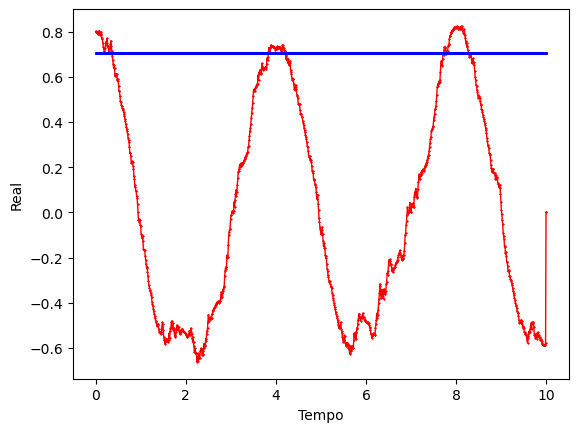

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()